<a href="https://colab.research.google.com/github/Prakhyasingh/BIG-DATA/blob/main/Practice_with_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PRACTICE WITH HIVE


In [35]:
# Step 1: Set Up PySpark in Google Colab
# Install PySpark
!pip install pyspark

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Set JAVA_HOME environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Import Libraries
import pandas as pd
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("BostonHousing") \
    .getOrCreate()

# Step 2: Load the Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

file_name = "BostonHousing (1).csv"

# Read the CSV file into a Spark DataFrame
spark_df = spark.read.csv(file_name, header=True, inferSchema=True)

# Step 3: Create a Temporary View
spark_df.createOrReplaceTempView("BostonHousing")




Saving BostonHousing.csv to BostonHousing (3).csv


TASK 01: Data Overview

In [36]:
# Run HiveQL-like Queries using Spark SQL

# Retrieve and display the first 5 rows
first_five_rows = spark.sql("SELECT * FROM BostonHousing LIMIT 5")
first_five_rows.show()

# Count the total number of records
total_records = spark.sql("SELECT COUNT(*) FROM BostonHousing")
total_records.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+--------+
|count(1)|
+--------+
|     506|
+--------+



TASK 02


In [37]:
# Calculate basic statistics for "medv" (median home value)
medv_stats = spark_df.selectExpr("mean(medv) as mean_medv",
                                 "stddev_samp(medv) as stddev_medv",
                                 "min(medv) as min_medv",
                                 "max(medv) as max_medv").collect()[0]

print("Statistics for 'medv' (Median Home Value):")
print(f"Mean: {medv_stats['mean_medv']:.2f}")
print(f"Standard Deviation: {medv_stats['stddev_medv']:.2f}")
print(f"Minimum: {medv_stats['min_medv']:.2f}")
print(f"Maximum: {medv_stats['max_medv']:.2f}")

# Calculate mean "rm" (average number of rooms)
mean_rm = spark_df.agg({"rm": "mean"}).collect()[0][0]
print("\nMean of 'rm' (Average Number of Rooms per Dwelling):")
print(f"{mean_rm:.2f}")


Statistics for 'medv' (Median Home Value):
Mean: 22.53
Standard Deviation: 9.20
Minimum: 5.00
Maximum: 50.00

Mean of 'rm' (Average Number of Rooms per Dwelling):
6.28


TASK 03


In [38]:
# Identify property with the highest crime rate ("crim")
highest_crim_property = spark_df.orderBy(spark_df["crim"].desc()).first()
print("\nProperty with Highest Crime Rate:")
print(highest_crim_property)

# Find property with the lowest median home value ("medv")
lowest_medv_property = spark_df.orderBy(spark_df["medv"]).first()
print("\nProperty with Lowest Median Home Value:")
print(lowest_medv_property)



Property with Highest Crime Rate:
Row(crim=88.9762, zn=0.0, indus=18.1, chas=0, nox=0.671, rm=6.968, age=91.9, dis=1.4165, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=17.21, medv=10.4)

Property with Lowest Median Home Value:
Row(crim=38.3518, zn=0.0, indus=18.1, chas=0, nox=0.693, rm=5.453, age=100.0, dis=1.4896, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=30.59, medv=5.0)


TASK 04: Data Distribution Analysis

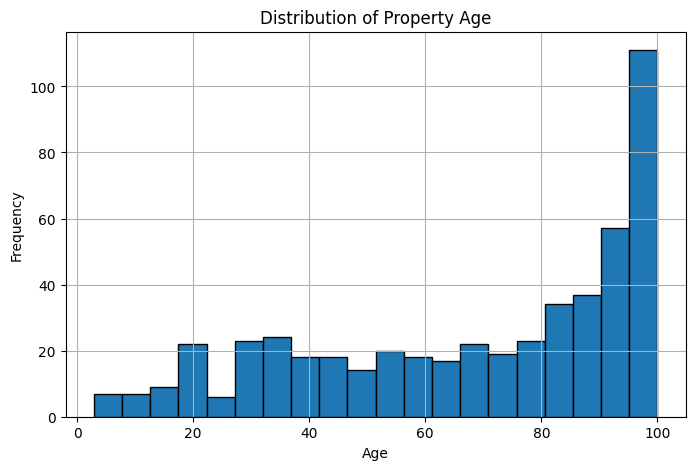


Percentage of Properties with 'chas' Value of 1: 6.92%


In [39]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
age_df = spark_df.select("age").toPandas()

# Plot histogram of "age" column
plt.figure(figsize=(8, 5))
plt.hist(age_df["age"], bins=20, edgecolor='black')
plt.title("Distribution of Property Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate percentage of properties with "chas" value of 1
num_chas_properties = spark_df.filter(spark_df["chas"] == 1).count()
total_properties = spark_df.count()
percentage_chas = (num_chas_properties / total_properties) * 100
print(f"\nPercentage of Properties with 'chas' Value of 1: {percentage_chas:.2f}%")


TASK 05: CORRELATION ANALYSIS


In [40]:
# Calculate correlation coefficient between "rm" and "medv"
correlation_rm_medv = spark_df.stat.corr("rm", "medv")
print("\nCorrelation between 'rm' and 'medv':", correlation_rm_medv)

# Investigate correlation between "ptratio" and "nox"
correlation_ptratio_nox = spark_df.stat.corr("ptratio", "nox")
print("Correlation between 'ptratio' and 'nox':", correlation_ptratio_nox)



Correlation between 'rm' and 'medv': 0.6953599470715401
Correlation between 'ptratio' and 'nox': 0.18893267711276893


TASK 06: ADVANCE QUERYING

In [41]:
# Top 5 neighborhoods with highest median home values ("medv")
top_neighborhoods = spark.sql("SELECT zn AS neighborhood, AVG(medv) AS avg_medv "
                              "FROM BostonHousing "
                              "GROUP BY zn "
                              "ORDER BY avg_medv DESC "
                              "LIMIT 5")
print("\nTop 5 Neighborhoods with Highest Median Home Values:")
top_neighborhoods.show()

# Average property age for neighborhoods with "chas" value of 1 vs 0
avg_age_chas_1 = spark.sql("SELECT AVG(age) AS avg_age_chas_1 "
                           "FROM BostonHousing "
                           "WHERE chas = 1").collect()[0]["avg_age_chas_1"]

avg_age_chas_0 = spark.sql("SELECT AVG(age) AS avg_age_chas_0 "
                           "FROM BostonHousing "
                           "WHERE chas = 0").collect()[0]["avg_age_chas_0"]

print(f"\nAverage Property Age for Neighborhoods with 'chas' Value of 1: {avg_age_chas_1:.2f}")
print(f"Average Property Age for Neighborhoods with 'chas' Value of 0: {avg_age_chas_0:.2f}")



Top 5 Neighborhoods with Highest Median Home Values:
+------------+-----------------+
|neighborhood|         avg_medv|
+------------+-----------------+
|        95.0|           41.575|
|        90.0|            38.34|
|        20.0|35.46666666666666|
|        45.0|33.43333333333333|
|        82.5|             33.2|
+------------+-----------------+


Average Property Age for Neighborhoods with 'chas' Value of 1: 77.50
Average Property Age for Neighborhoods with 'chas' Value of 0: 67.91


TASK 07: VISUALIZATION

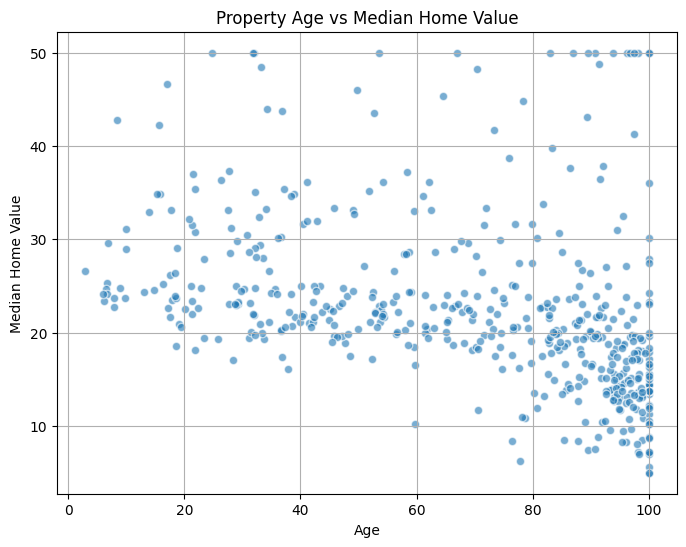

In [42]:
# Create a Hive view named "property_age_view"
spark_df.createOrReplaceTempView("property_age_view")

# Scatter plot of property age vs median home value
age_medv_df = spark.sql("SELECT age, medv FROM property_age_view").toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(age_medv_df["age"], age_medv_df["medv"], alpha=0.6, edgecolors='w')
plt.title("Property Age vs Median Home Value")
plt.xlabel("Age")
plt.ylabel("Median Home Value")
plt.grid(True)
plt.show()


TASK 08: OUTLIERS DETECTION

In [43]:
# Properties with "crim" value greater than 10
outliers = spark_df.filter(spark_df["crim"] > 10).collect()
print("\nProperties with 'crim' Value Greater Than 10:")
for property in outliers:
    print(property)



Properties with 'crim' Value Greater Than 10:
Row(crim=13.5222, zn=0.0, indus=18.1, chas=0, nox=0.631, rm=3.863, age=100.0, dis=1.5106, rad=24, tax=666, ptratio=20.2, b=131.42, lstat=13.33, medv=23.1)
Row(crim=11.1081, zn=0.0, indus=18.1, chas=0, nox=0.668, rm=4.906, age=100.0, dis=1.1742, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=34.77, medv=13.8)
Row(crim=18.4982, zn=0.0, indus=18.1, chas=0, nox=0.668, rm=4.138, age=100.0, dis=1.137, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=37.97, medv=13.8)
Row(crim=19.6091, zn=0.0, indus=18.1, chas=0, nox=0.671, rm=7.313, age=97.9, dis=1.3163, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=13.44, medv=15.0)
Row(crim=15.288, zn=0.0, indus=18.1, chas=0, nox=0.671, rm=6.649, age=93.3, dis=1.3449, rad=24, tax=666, ptratio=20.2, b=363.02, lstat=23.24, medv=13.9)
Row(crim=23.6482, zn=0.0, indus=18.1, chas=0, nox=0.671, rm=6.38, age=96.2, dis=1.3861, rad=24, tax=666, ptratio=20.2, b=396.9, lstat=23.69, medv=13.1)
Row(crim=17.8667, zn=0.0, indus=1

TASK 09: HYPOTHESIS TESTING

In [44]:
# Example:
from scipy.stats import pearsonr

# Extract "rm" and "medv" columns
rm_values = spark_df.select("rm").rdd.flatMap(lambda x: x).collect()
medv_values = spark_df.select("medv").rdd.flatMap(lambda x: x).collect()

# Perform hypothesis test (e.g., Pearson correlation coefficient)
corr_coeff, p_value = pearsonr(rm_values, medv_values)
print(f"\nPearson Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.2f}")



Pearson Correlation Coefficient: 0.70
P-value: 0.00
